In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import os

In [6]:
data = pd.read_excel("/content/online_retail_II.xlsx")

In [10]:
data.shape

(541910, 8)

In [11]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [13]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#Removing Duplicates
filtered_data = data[['Country','Customer ID']].drop_duplicates()
filtered_data.head()

,Country,Customer ID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [14]:
filtered_data.shape

(4389, 2)

<Axes: xlabel='Country'>

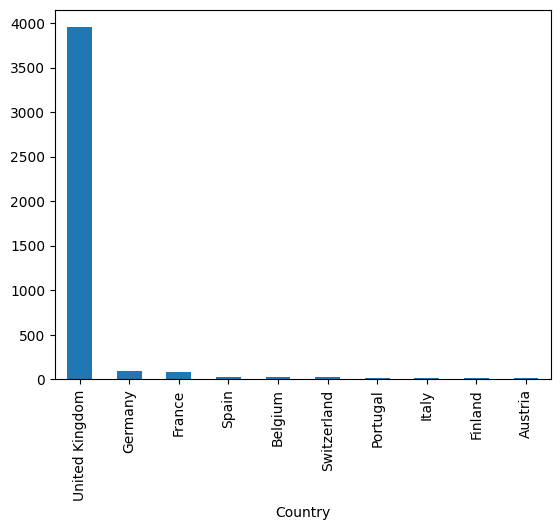

In [15]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [16]:
uk_data = data[data.Country == 'United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   Price        495478 non-null  float64       
 6   Customer ID  361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [17]:
uk_data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,495478.000000,495478,495478.000000,361878.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,227.588756,NaN,99.315438,1594.402590


In [18]:
#filtering quantities which are greater than zero
uk_data = uk_data[uk_data.Quantity > 0]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   Price        486286 non-null  float64       
 6   Customer ID  354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


In [20]:
uk_data = uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price']]

In [23]:
#Total Purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['Price']
uk_data.head()

<ipython-input-23-8484cfb78fc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['Price']


,Customer ID,InvoiceDate,Invoice,Quantity,Price,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [30]:
uk_data_group = uk_data.groupby('Customer ID').agg({'InvoiceDate': lambda date:(date.max() - date.min()).days,
                                                    'Invoice': lambda num : len(num),
                                                    'Quantity': lambda quant : quant.sum(),
                                                    'TotalPurchase': lambda price : price.sum()})

In [31]:
uk_data_group.head()

,InvoiceDate,Invoice,Quantity,TotalPurchase
Customer ID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [35]:
uk_data_group.columns = ['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
Customer ID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


Calculating CLTV ->
CLTV = ((Ave. Order Value x Purchase Freq.)/Churn rate) x Profit Margin

In [38]:
#Calculate Ave. Order Value
uk_data_group['Ave_order_value'] = uk_data_group['spent_money']/uk_data_group['num_transactions']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value
Customer ID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


In [39]:
#calculate Purchase Frequeny
purchase_frequency  = sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value
Customer ID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


In [40]:
purchase_frequency

90.37107880642694

In [41]:
#calculate Repeat Rate
repeat_rate = uk_data_group[uk_data_group['num_transactions'] > 1].shape[0]/uk_data_group.shape[0]
repeat_rate

0.9818923743942872

In [42]:
#Churn Rate
churn_rate = 1 - repeat_rate
churn_rate

0.018107625605712774

In [44]:
purchase_frequency , repeat_rate , churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

In [45]:
#Profit Margin
uk_data_group['profit_margin'] = uk_data_group['spent_money']*0.05
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value,profit_margin
Customer ID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170


In [46]:
#Customer Value
uk_data_group['CLV'] = (uk_data_group['Ave_order_value'] * purchase_frequency)/churn_rate
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value,profit_margin,CLV
Customer ID,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04


In [47]:
uk_data_group['cust_lifetime_value'] = uk_data_group['CLV'] + uk_data_group['profit_margin']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value,profit_margin,CLV,cust_lifetime_value
Customer ID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,3.852098e+08
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,2.035238e+05
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,3.830208e+04
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,1.028008e+05
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,7.975909e+04


In [48]:
uk_data_group.shape

(3921, 8)

In [50]:
uk_data_group.tail()

,num_days,num_transactions,num_units,spent_money,Ave_order_value,profit_margin,CLV,cust_lifetime_value
Customer ID,,,,,,,,
18280.0,0,10,45,180.60,18.060000,9.0300,90133.390141,90142.420141
18281.0,0,7,54,80.82,11.545714,4.0410,57622.058149,57626.099149
18282.0,118,12,103,178.05,14.837500,8.9025,74050.618838,74059.521338
18283.0,333,756,1397,2094.88,2.771005,104.7440,13829.462956,13934.206956
18287.0,158,70,1586,1837.28,26.246857,91.8640,130992.149215,131084.013215


Prediction Model for CLTV

In [53]:
uk_data.shape

(486286, 6)

In [54]:
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x : x.strftime('%b - %Y'))

In [55]:
uk_data.head()

,Customer ID,InvoiceDate,Invoice,Quantity,Price,TotalPurchase,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec - 2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec - 2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec - 2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec - 2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec - 2010


In [56]:
sale = uk_data.pivot_table(index = 'Customer ID', columns = 'month_yr', values = 'TotalPurchase', aggfunc = 'sum', fill_value=0).reset_index()
sale.head()

month_yr,Customer ID,Apr - 2011,Aug - 2011,Dec - 2010,Dec - 2011,Feb - 2011,Jan - 2011,Jul - 2011,Jun - 2011,Mar - 2011,May - 2011,Nov - 2011,Oct - 2011,Sep - 2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77


In [57]:
sale.shape

(3921, 14)

In [59]:
sale['CLV'] = sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,Customer ID,Apr - 2011,Aug - 2011,Dec - 2010,Dec - 2011,Feb - 2011,Jan - 2011,Jul - 2011,Jun - 2011,Mar - 2011,May - 2011,Nov - 2011,Oct - 2011,Sep - 2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,154367.20
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,8392.02
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84,65238.72
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,8181.76
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,1884.68


In [71]:
X = sale[['Dec - 2011', 'Nov - 2011', 'Oct - 2011' , 'Sep - 2011' , 'Aug - 2011', 'Jul - 2011']]
y = sale[['CLV']]

In [72]:
#Splitting in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [74]:
print(regressor.intercept_)
print(regressor.coef_)

[417.01939233]
[[1.99761101 1.60762508 3.20453659 3.34866456 3.05721627 5.75918898]]


In [76]:
coefficeints = regressor.coef_.reshape(6,1)
df = pd.DataFrame(coefficeints , index= X_train.columns)
df

,0
month_yr,
Dec - 2011,1.997611
Nov - 2011,1.607625
Oct - 2011,3.204537
Sep - 2011,3.348665
Aug - 2011,3.057216
Jul - 2011,5.759189


In [77]:
from sklearn import metrics
print("R-square:",metrics.r2_score(y_test , y_pred))

R-square: 0.9666074402817512


In [78]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1190.0564569402463
MSE: 8456559.55947157
RMSE: 2908.016430399177
